# ASSIGNMENT - 2

### Problem Statement
Convolutional neural network (CNN) (Any One from the following)
- Use any dataset of plant disease and design a plant disease detection system using CNN.
- Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 102s 23us/step


In [3]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

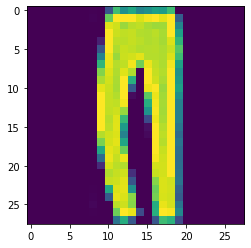

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[2])

In [5]:
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [6]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [7]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [9]:
history = classifier.fit(trainX, trainY,
 batch_size=128, epochs=20,
 verbose=2,
 validation_data=(testX, testY))

Epoch 1/20
469/469 - 19s - loss: 0.5701 - accuracy: 0.7950 - val_loss: 0.3959 - val_accuracy: 0.8588
Epoch 2/20
469/469 - 19s - loss: 0.3656 - accuracy: 0.8667 - val_loss: 0.3594 - val_accuracy: 0.8684
Epoch 3/20
469/469 - 20s - loss: 0.3156 - accuracy: 0.8848 - val_loss: 0.3060 - val_accuracy: 0.8875
Epoch 4/20
469/469 - 20s - loss: 0.2887 - accuracy: 0.8947 - val_loss: 0.2987 - val_accuracy: 0.8904
Epoch 5/20
469/469 - 20s - loss: 0.2641 - accuracy: 0.9040 - val_loss: 0.2926 - val_accuracy: 0.8923
Epoch 6/20
469/469 - 20s - loss: 0.2457 - accuracy: 0.9093 - val_loss: 0.2582 - val_accuracy: 0.9042
Epoch 7/20
469/469 - 20s - loss: 0.2293 - accuracy: 0.9148 - val_loss: 0.2529 - val_accuracy: 0.9085
Epoch 8/20
469/469 - 21s - loss: 0.2140 - accuracy: 0.9210 - val_loss: 0.2512 - val_accuracy: 0.9066
Epoch 9/20
469/469 - 21s - loss: 0.2012 - accuracy: 0.9254 - val_loss: 0.2589 - val_accuracy: 0.9073
Epoch 10/20
469/469 - 21s - loss: 0.1856 - accuracy: 0.9308 - val_loss: 0.2392 - val_accura

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [17]:
from keras.preprocessing import image
import numpy as np
test_img = image.load_img('bag.png', target_size=(28, 28))
test_img = image.img_to_array(test_img)
test_img = test_img[:,:,1].reshape(1,28,28,1)
test_img = test_img/255
# classifier.predict_classes(test_img)
# (classifier.predict(test_img) > 0.5).astype("int32")
np.argmax(classifier.predict(test_img), axis=-1)

array([8], dtype=int64)